# Práctica 4: Entrenamiento de redes neuronales

In [89]:
# Library imports

import numpy as np
from pandas.io.parsers import read_csv
from matplotlib import pyplot as plt
from scipy.io import loadmat
import scipy.optimize as opt
import operator
from displayData import displayData


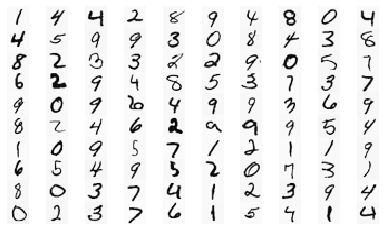

In [90]:
# Loading data
data = loadmat('ex4data1.mat')

y = data['y'].ravel()
X = data['X']
X_ones = np.hstack([np.ones([X.shape[0], 1]), X])

INIT_EPSILON = 0.01

# Loading weights
weights = loadmat('ex4weights.mat')
theta1, theta2 = weights['Theta1'], weights['Theta2']

random_theta1 = np.random.random((25, 401)) * (2 * INIT_EPSILON) - INIT_EPSILON
random_theta2 = np.random.random((10, 26)) * (2 * INIT_EPSILON) - INIT_EPSILON
# Displaying data
sample = np.random.choice(X.shape[0], 100)
imgs = displayData(X[sample, :])

In [91]:
def sigmoid(X):
    return 1 / (1 + np.exp(-X))
# Forward propagation
def forward_propagate(X, theta1, theta2):
    m = X.shape[0]

    a1 = np.hstack([np.ones([m, 1]), X])
    z2 = np.dot(a1, theta1.T)
    a2 = np.hstack([np.ones([m, 1]), sigmoid(z2)])
    z3 = np.dot(a2, theta2.T)
    h = sigmoid(z3)

    return a1, z2, a2, z3, h

In [104]:
# Cost function
def backprop(params_rn, num_entradas, num_ocultas, num_etiquetas, X, y, reg):
    """ backprop devuelve el coste y el gradiente de una red neuronal de dos capas """
    theta1 = np.reshape(params_rn[:num_ocultas * (num_entradas + 1)], (num_ocultas, (num_entradas + 1)))
    theta2 = np.reshape(params_rn[num_ocultas * (num_entradas + 1):], (num_etiquetas, (num_ocultas + 1)))

    a1, z2, a2, z3, h = forward_propagate(X, theta1, theta2)
    m = X.shape[0]

    y = (y - 1)
    y_onehot = np.zeros((m, num_etiquetas))

    total = 0
    for i in range(m):
        y_onehot[i][y[i]] = 1
        for k in range(num_etiquetas):
            term_1 = - (np.log(h[i][k]) * y_onehot[i][k])
            term_2 = - (np.log(1 - h[i][k]) * (1 - y_onehot[i][k]))
            total = total + (term_1 + term_2)

    sum_theta1 = np.sum(np.square(theta1))
    sum_theta2 = np.sum(np.square(theta2))

    term_3 = (sum_theta1 + sum_theta2) * (reg / (2 * m))

    return (total / m) + term_3

params_rn = np.concatenate((np.ravel(theta1), np.ravel(theta2)))

backprop(params_rn, 400, 25, 10, X, y, 1)

0.3844877962428953